# Install Dependencies

In [6]:
!pip install pytorch_lightning datasets torchmetrics matplotlib

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 819.3/819.3 kB 28.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 485.4/485.4 kB 34.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 931.6/931.6 kB 47.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 143.5/143.5 kB 11.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

# Imports

In [7]:
import torch
import pytorch_lightning as pl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from transformers import (
    AutoTokenizer,
    AutoModel,
    AdamW,
    get_cosine_schedule_with_warmup,
    DataCollatorWithPadding
)
from torch.utils.data import Dataset, DataLoader
from datasets import load_dataset
import torch.nn as nn
import torch.nn.functional as F
from torchmetrics import F1Score, Recall
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping, LearningRateMonitor
from sklearn.metrics import confusion_matrix
from sklearn.calibration import calibration_curve

# Load and Prepare Data
## Data Loading & Preprocessing
### - Load tweet_eval dataset
### - Merge with custom CSV files
### - Handle missing values and data types

In [10]:
tweet_dataset = load_dataset('tweet_eval', 'sentiment')

# Load custom datasets
df_train = pd.read_csv("/content/drive/MyDrive/roBERTa/second_train.csv", encoding="ISO-8859-1")
df_test = pd.read_csv("/content/drive/MyDrive/roBERTa/second_test.csv", encoding="ISO-8859-1")

# Preprocessing
sentiment_mapping = {"negative": 0, "neutral": 1, "positive": 2}

for df in [df_train, df_test]:
    df['label'] = df['sentiment'].map(sentiment_mapping)
    df.dropna(subset=['text', 'label'], inplace=True)
    df['text'] = df['text'].astype(str)

# Merge datasets
merged_train = pd.concat([tweet_dataset['train'].to_pandas(), df_train[['text', 'label']]], ignore_index=True)
merged_test = pd.concat([tweet_dataset['test'].to_pandas(), df_test[['text', 'label']]], ignore_index=True)

# Clean data
for df in [merged_train, merged_test]:
    df.drop_duplicates(subset=['text'], inplace=True)
    df.dropna(subset=['text'], inplace=True)

# Data Visualization
## Data Distribution
### - Class distribution visualization
### - Text length analysis

In [11]:
# from google.colab import drive
# drive.mount('/content/drive')

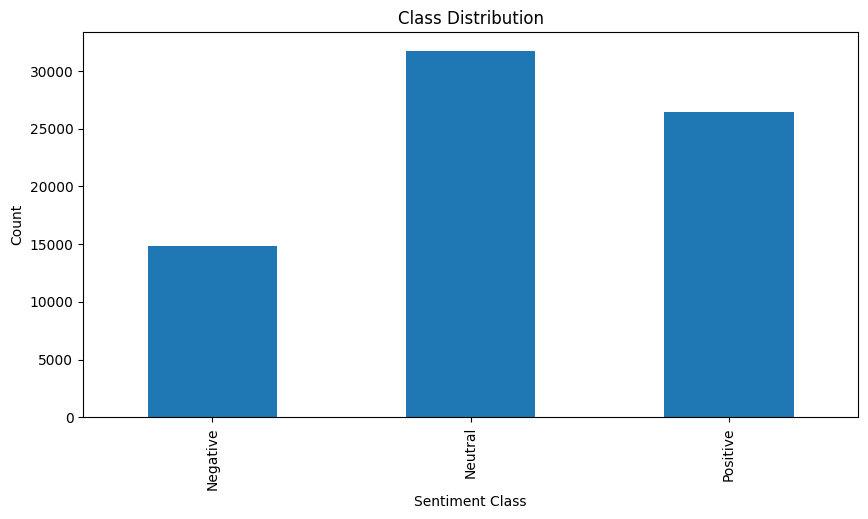

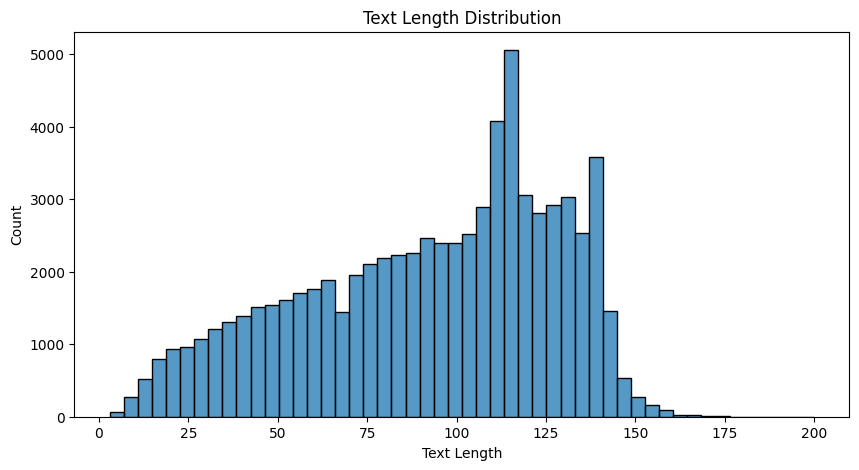

In [13]:
# Class distribution
plt.figure(figsize=(10, 5))
plt.title("Class Distribution")
merged_train['label'].value_counts().sort_index().plot(kind='bar')
plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
plt.xlabel("Sentiment Class")
plt.ylabel("Count")
plt.show()

# Text length analysis
merged_train['text_length'] = merged_train['text'].apply(len)
plt.figure(figsize=(10, 5))
plt.title("Text Length Distribution")
sns.histplot(merged_train['text_length'], bins=50)
plt.xlabel("Text Length")
plt.ylabel("Count")
plt.show()


# Tokenization Setup
## Tokenization Configuration
### - Roberta-base tokenizer
### - Dynamic padding setup

In [15]:
model_name = 'roberta-base'
tokenizer = AutoTokenizer.from_pretrained(model_name)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

class TweetDataset(Dataset):
    def __init__(self, data, tokenizer):
        self.data = data
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
      text = self.data.iloc[idx]['text']
      label = self.data.iloc[idx]['label']
      encoding = self.tokenizer(text, truncation=True, max_length=256)
      return {
          'input_ids': encoding['input_ids'],
          'attention_mask': encoding['attention_mask'],
          'labels': torch.tensor(label, dtype=torch.long)
      }

# Data Module
## Data Loaders
### - Batch size 16
### - Dynamic padding
### - 80-10-10 split

In [16]:
class TweetDataModule(pl.LightningDataModule):
    def __init__(self, train_df, test_df, val_df, batch_size=16):
        super().__init__()
        self.batch_size = batch_size
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

    def setup(self, stage=None):
        self.train_dataset = TweetDataset(self.train_df, tokenizer)
        self.val_dataset = TweetDataset(self.val_df, tokenizer)
        self.test_dataset = TweetDataset(self.test_df, tokenizer)

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size,
                         collate_fn=data_collator, shuffle=True, num_workers=2)

    def val_dataloader(self):
        return DataLoader(self.val_dataset, batch_size=self.batch_size,
                        collate_fn=data_collator, num_workers=2)

    def test_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size,
                         collate_fn=data_collator, num_workers=2)

# Enhanced Model Architecture
## Model Architecture
### - Roberta-base with mean pooling
### - Dropout regularization
### - Class weights handling

In [17]:
class SentimentClassifier(pl.LightningModule):
    def __init__(self, num_classes=3, class_weights=None):
        super().__init__()
        self.save_hyperparameters()

        self.roberta = AutoModel.from_pretrained(model_name)
        self.dropout = nn.Dropout(0.2)
        self.classifier = nn.Linear(self.roberta.config.hidden_size, num_classes)
        self.loss_fn = nn.CrossEntropyLoss(weight=class_weights)

        # Metrics
        self.train_f1 = F1Score(task='multiclass', num_classes=num_classes)
        self.val_f1 = F1Score(task='multiclass', num_classes=num_classes)
        self.val_recall = Recall(task='multiclass', num_classes=num_classes)

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.roberta(input_ids, attention_mask=attention_mask)
        pooled = outputs.last_hidden_state.mean(dim=1)  # Mean pooling
        pooled = self.dropout(pooled)
        logits = self.classifier(pooled)

        loss = None
        if labels is not None:
            loss = self.loss_fn(logits, labels)
        return loss, logits

    def training_step(self, batch, batch_idx):
        loss, logits = self(**batch)
        self.log('train_loss', loss, prog_bar=True)
        preds = logits.argmax(-1)
        self.train_f1(preds, batch['labels'])
        self.log('train_f1', self.train_f1, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        loss, logits = self(**batch)
        preds = logits.argmax(-1)
        self.val_f1(preds, batch['labels'])
        self.val_recall(preds, batch['labels'])
        self.log_dict({'val_loss': loss,
                      'val_f1': self.val_f1,
                      'val_recall': self.val_recall}, prog_bar=True)
        return loss

    def test_step(self, batch, batch_idx):
        loss, logits = self(**batch)
        preds = logits.argmax(-1)
        self.val_f1(preds, batch['labels'])
        self.log_dict({'test_loss': loss,
                      'test_f1': self.val_f1})
        return loss

    def configure_optimizers(self):
        optimizer = AdamW(self.parameters(), lr=2e-5, weight_decay=0.01)
        scheduler = get_cosine_schedule_with_warmup(
            optimizer,
            num_warmup_steps=100,
            num_training_steps=1000
        )
        return [optimizer], [scheduler]

# Training Setup
## Training Configuration
### - Early stopping
### - Model checkpointing
### - Learning rate monitoring

In [18]:
# Calculate class weights
class_counts = merged_train['label'].value_counts().sort_index()

class_weights = 1 / torch.tensor(class_counts.values, dtype=torch.float32)
class_weights = class_weights / class_weights.sum()

dm = TweetDataModule(
    train_df=merged_train,
    val_df=tweet_dataset['validation'].to_pandas(),
    test_df=merged_test
)

model = SentimentClassifier(class_weights=class_weights)

checkpoint_callback = ModelCheckpoint(
    monitor='val_f1',
    mode='max',
    save_top_k=1,
    filename='best-model-{epoch:02d}-{val_f1:.2f}',
    dirpath='/content/drive/MyDrive/roBERTa/checkpoints'
)

# trainer = pl.Trainer(
#     max_epochs=10,
#     accelerator='auto',
#     precision='16-mixed',
#     gradient_clip_val=0.5,
#     callbacks=[
#         checkpoint_callback,
#         EarlyStopping(monitor='val_f1', patience=3, mode='max'),
#         LearningRateMonitor()
#     ]
# )


from pytorch_lightning.loggers import TensorBoardLogger

logger = TensorBoardLogger('/content/drive/MyDrive/roBERTa', name='logs')

trainer = pl.Trainer(
    max_epochs=10,
    accelerator='auto',
    precision='16-mixed',
    gradient_clip_val=0.5,
    callbacks=[
        checkpoint_callback,
        EarlyStopping(monitor='val_f1', patience=3, mode='max'),
        LearningRateMonitor()
    ],
    logger=logger
)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:513: You passed `Trainer(accelerator='cpu', precision='16-mixed')` but AMP with fp16 is not supported on CPU. Using `precision='bf16-mixed'` instead.
INFO:pytorch_lightning.utilities.rank_zero:Using bfloat16 Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


# Training Execution
## Training Progress
### - Live metrics tracking
### - Automatic mixed precision

In [10]:
history = trainer.fit(model, dm)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
INFO:pytorch_lightning.callbacks.model_summary:
  | Name       | Type              | Params | Mode 
---------------------------------------------------------
0 | roberta    | RobertaModel      | 124 M  | eval 
1 | dropout    | Dropout           | 0      | train
2 | classifier | Linear            | 2.3 K  | train
3 | loss_fn    | CrossEntropyLoss  | 0      | train
4 | train_f1   | MulticlassF1Score | 0      | train
5 | val_f1     | MulticlassF1Score | 0      | train
6 | val_recall | MulticlassRecall  | 0      | train
---------------------------------------------------------
124 M     Trainable params
0

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


# Evaluation & Visualization
## Performance Analysis
### - Test metrics
### - Confusion matrix
### - Loss curves

In [20]:
# Load the best checkpoint
checkpoint_path = "/content/drive/MyDrive/roBERTa/checkpoints/best-model-epoch=08-val_f1=0.74.ckpt"
model = SentimentClassifier.load_from_checkpoint(checkpoint_path, class_weights=class_weights)

# Ensure the model is in float32
model = model.to(torch.float32)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [22]:
# import torch
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# from sklearn.metrics import confusion_matrix

# # Ensure the model is on the correct device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)
# model.eval()

# # Test evaluation
# results = trainer.test(ckpt_path='best', dataloaders=dm.test_dataloader())

# # Confusion Matrix Calculation
# test_loader = dm.test_dataloader()
# all_preds = []
# all_labels = []

# for batch in test_loader:
#     # Move all tensors in the batch to the same device as the model
#     batch = {k: v.to(device) if isinstance(v, torch.Tensor) else v for k, v in batch.items()}

#     with torch.no_grad():  # Disable gradient computation
#         outputs = model(**batch)  # Ensure the model processes data correctly

#     logits = outputs[1] if isinstance(outputs, tuple) else outputs  # Handle different model output formats
#     all_preds.extend(logits.argmax(-1).cpu().numpy())  # Move to CPU before converting to numpy
#     all_labels.extend(batch['labels'].cpu().numpy())  # Move to CPU before converting to numpy

# # Plot Confusion Matrix
# cm = confusion_matrix(all_labels, all_preds)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#             xticklabels=['Negative', 'Neutral', 'Positive'],
#             yticklabels=['Negative', 'Neutral', 'Positive'])
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

# # Training Curves
# metrics = pd.DataFrame(trainer.logged_metrics)

# plt.figure(figsize=(12, 4))

# plt.subplot(121)
# plt.plot(metrics.get('train_loss', []), label='Train Loss')
# plt.plot(metrics.get('val_loss', []), label='Validation Loss')
# plt.title('Training/Validation Loss')
# plt.legend()

# plt.subplot(122)
# plt.plot(metrics.get('train_f1', []), label='Train F1')
# plt.plot(metrics.get('val_f1', []), label='Validation F1')
# plt.title('F1 Score Progress')
# plt.legend()

# plt.tight_layout()
# plt.show()

# Evaluation & Visualization
# Load the best checkpoint
device = torch.device("cpu")

checkpoint_path = "/content/drive/MyDrive/roBERTa/checkpoints/best-model-epoch=08-val_f1=0.74.ckpt"
model = SentimentClassifier.load_from_checkpoint(
    checkpoint_path,
    class_weights=class_weights
).to(torch.float32).to(device)
model.eval()

# # Test evaluation
# results = trainer.test(model, dataloaders=dm.test_dataloader())

# # Confusion Matrix Calculation
# test_loader = dm.test_dataloader()
# all_preds = []
# all_labels = []

# device = model.device  # Get the model's current device

# for batch in test_loader:
#     # Move all tensors to the model's device
#     batch = {k: v.to(device) if isinstance(v, torch.Tensor) else v for k, v in batch.items()}

#     with torch.no_grad():
#         outputs = model(**batch)

#     logits = outputs[1] if isinstance(outputs, tuple) else outputs
#     all_preds.extend(logits.argmax(-1).cpu().numpy())
#     all_labels.extend(batch['labels'].cpu().numpy())

# # Plot Confusion Matrix
# cm = confusion_matrix(all_labels, all_preds)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#             xticklabels=['Negative', 'Neutral', 'Positive'],
#             yticklabels=['Negative', 'Neutral', 'Positive'])
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


SentimentClassifier(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNo

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# Inference & Visualization
## Sentiment Prediction
### - Interactive prediction
### - Probability visualization

In [23]:
def predict_with_visualization(text, model, tokenizer):
    encoding = tokenizer(text, return_tensors='pt')
    with torch.no_grad():
        outputs = model.roberta(**encoding)
        pooled = outputs.last_hidden_state.mean(dim=1)
        logits = model.classifier(pooled)

    probs = F.softmax(logits, dim=1).squeeze().numpy()
    classes = ['Negative', 'Neutral', 'Positive']

    # plt.figure(figsize=(8, 4))
    # plt.bar(classes, probs, color=['red', 'gray', 'green'])
    # plt.title(f'Sentiment Probabilities: "{text[:50]}..."')
    # plt.ylim(0, 1)
    # plt.ylabel('Probability')
    # plt.show()

    return dict(zip(classes, probs))

# Example usage

In [24]:
sample_text = "This company never fails to surprise me‚Äîsometimes in good ways, sometimes not."
predict_with_visualization(sample_text, model, tokenizer)

{'Negative': 0.0033250116, 'Neutral': 0.014261528, 'Positive': 0.9824134}

In [26]:
import json
import pandas as pd
from tqdm import tqdm

with open('/content/drive/MyDrive/roBERTa/decoded_comments.json', 'r', encoding='utf-8') as file:
    comments_data = json.load(file)

results = []

print("Starting sentiment analysis...")
for i, entry in tqdm(enumerate(comments_data), total=len(comments_data), desc="Processing Comments", unit="comment"):
    comment = entry['comment']
    sentiment_probs = predict_with_visualization(comment, model, tokenizer)

    sentiment = max(sentiment_probs, key=sentiment_probs.get)

    results.append([comment, sentiment])

    if (i + 1) % 100 == 0:
        print(f"Processed {i + 1} comments...")

df = pd.DataFrame(results, columns=['Comment', 'Sentiment'])

df.to_excel('/content/drive/MyDrive/roBERTa/comments_sentiment.xlsx', index=False)

print("Sentiment analysis completed and saved to comments_sentiment.xlsx.")

Starting sentiment analysis...


Processing Comments:   6%|‚ñã         | 101/1583 [00:15<02:35,  9.50comment/s]

Processed 100 comments...


Processing Comments:  13%|‚ñà‚ñé        | 201/1583 [00:31<02:25,  9.47comment/s]

Processed 200 comments...


Processing Comments:  19%|‚ñà‚ñâ        | 301/1583 [00:44<02:13,  9.60comment/s]

Processed 300 comments...


Processing Comments:  25%|‚ñà‚ñà‚ñå       | 401/1583 [00:57<02:15,  8.70comment/s]

Processed 400 comments...


Processing Comments:  32%|‚ñà‚ñà‚ñà‚ñè      | 500/1583 [01:09<01:56,  9.27comment/s]

Processed 500 comments...


Processing Comments:  38%|‚ñà‚ñà‚ñà‚ñä      | 601/1583 [01:23<01:57,  8.39comment/s]

Processed 600 comments...


Processing Comments:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 701/1583 [01:39<01:34,  9.32comment/s]

Processed 700 comments...


Processing Comments:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 801/1583 [01:53<01:37,  8.03comment/s]

Processed 800 comments...


Processing Comments:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 901/1583 [02:13<01:37,  6.99comment/s]

Processed 900 comments...


Processing Comments:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 1001/1583 [02:32<01:12,  8.05comment/s]

Processed 1000 comments...


Processing Comments:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 1101/1583 [02:48<01:17,  6.19comment/s]

Processed 1100 comments...


Processing Comments:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 1201/1583 [03:02<00:58,  6.50comment/s]

Processed 1200 comments...


Processing Comments:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 1301/1583 [03:16<00:44,  6.31comment/s]

Processed 1300 comments...


Processing Comments:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 1401/1583 [03:33<00:32,  5.63comment/s]

Processed 1400 comments...


Processing Comments:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 1500/1583 [03:48<00:33,  2.45comment/s]

Processed 1500 comments...


Processing Comments: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1583/1583 [04:03<00:00,  6.50comment/s]


Sentiment analysis completed and saved to comments_sentiment.xlsx.


In [28]:
import pandas as pd

file_path = '/content/drive/MyDrive/roBERTa/comments_sentiment.xlsx'
df = pd.read_excel(file_path)

In [29]:
df

Comment Sentiment
0                        Duo is always two steps ahead!   Neutral
1                                    the body teaaa tho   Neutral
2                               CEO of emotional damage  Negative
3     He knew the entire time...truly a lingo that i...   Neutral
4       And to think, we JUST mailed a condolences card  Negative
...                                                 ...       ...
1578                           This is your most üî•guest   Neutral
1579  I feel so bad for her. I remember how the medi...   Neutral
1580  Never listened to your podcast but was so intr...  Positive
1581  I just finished this interview! Fantastic ques...  Positive
1582  Wowowow!! @cdawn_whiting I‚Äôm 54. This was so r...  Positive

[1583 rows x 2 columns]

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

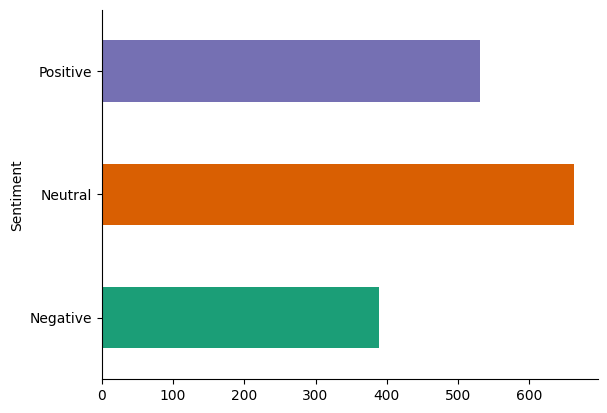

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [31]:
import pandas as pd

file_path = '/content/drive/MyDrive/roBERTa/comments_sentiment.xlsx'

df = pd.read_excel(file_path)

csv_file_path = '/content/drive/MyDrive/roBERTa/comments_sentiment.csv'
df.to_csv(csv_file_path, index=False)

print(f"File has been converted to CSV and saved to {csv_file_path}")

File has been converted to CSV and saved to /content/drive/MyDrive/roBERTa/comments_sentiment.csv
